In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [4]:
for city in cities:
    print(city)

khagaul
mahebourg
punta arenas
rikitea
verkhnyaya toyma
hithadhoo
kapaa
saskylakh
riyadh
bilma
todos santos
castro
disna
east london
busselton
rincon
banda aceh
tiksi
grand gaube
chokurdakh
ushuaia
higuey
pipri
atuona
yellowknife
aykhal
belushya guba
kyra
balikpapan
sorland
nioro
namatanai
cape town
shizuishan
indian head
pasighat
khatanga
albany
dikson
tigzirt
barentsburg
vaitupu
nanortalik
illoqqortoormiut
manggar
hovd
arlit
bluff
longyearbyen
pisco
tazovskiy
pandamatenga
kodiak
wuchi
lagoa
mys shmidta
veinticinco de mayo
sitka
mackay
attawapiskat
mataura
cockburn town
suining
jamestown
puerto ayora
vanimo
kohat
barrow
bredasdorp
nouadhibou
port elizabeth
saleaula
ambon
hobart
taolanaro
henties bay
samusu
arraial do cabo
pacific grove
tuktoyaktuk
taltal
sangar
vaini
umzimvubu
port alfred
narsaq
zhigansk
torbay
kavaratti
bengkulu
bambous virieux
fortuna
saint-philippe
airai
upernavik
vila
basudebpur
puerto del rosario
pevek
alta floresta
nizhneyansk
khash
cap-aux-meules
casablanca
dar

## Perform API Calls

In [6]:
# OpenWeatherMap API Key
api_key = api_keys.api_key
#api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

Response = requests.get(url + "&q=" + "todos santos").json()
Response

{'coord': {'lon': -110.23, 'lat': 23.45},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 76.53,
  'pressure': 1012,
  'humidity': 37,
  'temp_min': 66.99,
  'temp_max': 82.4},
 'visibility': 16093,
 'wind': {'speed': 16.11, 'deg': 150},
 'clouds': {'all': 5},
 'dt': 1557530123,
 'sys': {'type': 1,
  'id': 7165,
  'message': 0.005,
  'country': 'MX',
  'sunrise': 1557492109,
  'sunset': 1557539573},
 'id': 3981432,
 'name': 'Todos Santos',
 'cod': 200}

In [8]:
Response.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])

In [17]:
Response["coord"]["lat"]
Response["coord"]["lon"]
Response["main"]["humidity"]
Response["main"]["temp"]
Response["clouds"]["all"]
Response["name"]
Response["sys"]["country"]
Response['dt']

1557530123

In [21]:
lat = []
long=[]
humidity = []
wind_speed = []
temp = []
cloudness = []
city_name = []
country = []
dt = []

for city in cities:
    try:
        # perform an api call on the city
        Response = requests.get(url + "&q=" + city).json()

        # parse the information from the response (JSON)
        lat.append(Response["coord"]["lat"])
        long.append(Response["coord"]["lon"])
        humidity.append(Response["main"]["humidity"])
        wind_speed.append(Response["wind"]["speed"])
        temp.append(Response["main"]["temp"])
        cloudiness.append(Response["clouds"]["all"])
        city_name.append(Response["name"])  
        country.append(Response["sys"]["country"])
        dt.append(Response["dt"])
    
    except:
        print(city + " not found. Skipping...")
        pass

disna not found. Skipping...
higuey not found. Skipping...
belushya guba not found. Skipping...
kyra not found. Skipping...
barentsburg not found. Skipping...
vaitupu not found. Skipping...
illoqqortoormiut not found. Skipping...
mys shmidta not found. Skipping...
attawapiskat not found. Skipping...
saleaula not found. Skipping...
taolanaro not found. Skipping...
samusu not found. Skipping...
umzimvubu not found. Skipping...
bengkulu not found. Skipping...
nizhneyansk not found. Skipping...
olafsvik not found. Skipping...
akyab not found. Skipping...
ruatoria not found. Skipping...
marcona not found. Skipping...
tsihombe not found. Skipping...
marv dasht not found. Skipping...
aybak not found. Skipping...
hunza not found. Skipping...
wahran not found. Skipping...
guaratinga not found. Skipping...
mullaitivu not found. Skipping...
ascension not found. Skipping...
amderma not found. Skipping...
armacao dos buzios not found. Skipping...
bajo baudo not found. Skipping...
formoso do araguai

In [35]:
data = pd.DataFrame({"City": city_name,
                   "Cloudiness": cloudiness,
                   "Country": country,
                   "Date": dt,
                   "Humidity": humidity,
                   "Lat": lat,
                   "Lng":long,
                   "Temperature": temp,
                  "Wind Speed": wind_speed
                  })

In [36]:
data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temperature,Wind Speed
0,Khagaul,0,IN,1557527400,88,25.63,85.04,82.40,5.82
1,Mahebourg,40,MU,1557530346,60,-20.41,57.70,75.07,5.82
2,Punta Arenas,75,CL,1557529395,75,-53.16,-70.91,41.95,20.80
3,Rikitea,64,PF,1557530358,84,-23.12,-134.97,77.81,12.66
4,Verkhnyaya Toyma,0,RU,1557530358,84,62.24,45.00,54.41,6.60


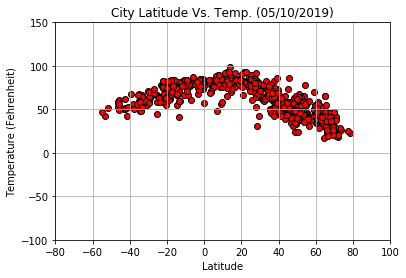

In [37]:
# Scatter plot to showcase the relationships:Temperature (F) vs. Latitude
# (marker="o", facecolors="red", edgecolors="black", s=scoop_price)
plt.scatter(data["Lat"], data["Temperature"], marker="o", facecolors="red", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude Vs. Temp. (05/10/2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Fehrenheit)")
plt.xlim(-80, 100)
plt.ylim(-100, 150)
plt.grid()

# # Save the image of the chart and print to screen
plt.savefig('Lat&TempScatter.png')
plt.show()

In [29]:
#The tropics from 23S to 23N, look to be rather delightful right now, with temperatures not yet reaching or exceeding 100 F while conditions in more polar regions, especially in the Northern hemisphere, are still on the cool side, exhibiting ''spring'' conditions.)

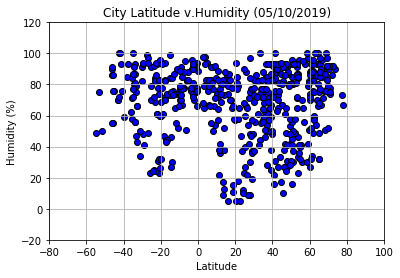

In [38]:
# Humidity (%) vs. Latitude Scatter plot
plt.scatter(data["Lat"], data["Humidity"], marker="o", facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude v.Humidity (05/10/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.xlim(-80, 100)
plt.ylim(-20, 120)

# # Save the image of the chart and print to screen
plt.savefig('Latitude_Humidity_Scattter.png')
plt.show()

In [ ]:
# Relative humidit varies more independently of latitude than the temperature, 
# but we can also say that relative hiumidity levels i nthe more polarly regions tends to be higher.

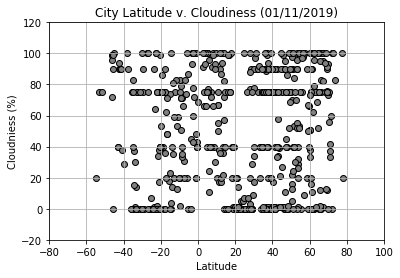

In [41]:
# loudiness (%) vs. Latitude Scatter plot
plt.scatter(data["Lat"], data["Cloudiness"], marker="o", facecolors="grey", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude v. Cloudiness (01/11/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudniess (%)")
plt.xlim(-80, 100)
plt.ylim(-20, 120)
plt.grid()

# # Save the image of the chart and print to screen
plt.savefig('Latitude_Cloud_Scatter.png')
plt.show()

In [ ]:
#Small band of lower cloudiness from 0 to ~20N, else litte correlation of latitude and cloudiness

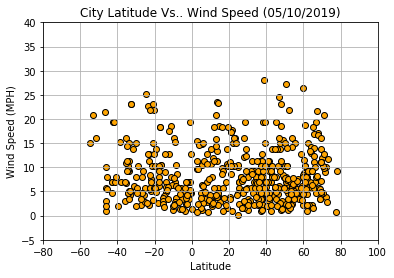

In [42]:
# Wind Speed (mph) vs. Latitude Scatter plot
plt.scatter(data["Lat"], data["Wind Speed"], marker="o", facecolors="orange", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude Vs.. Wind Speed (05/10/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.xlim(-80, 100)
plt.ylim(-5, 40)
plt.grid()

# # Save the image of the chart and print to screen
plt.savefig('Latitude_Wind_Scatter.png')
plt.show()

In [ ]:
#Wind speed appears to be relatively independent of latitude, although higher latitude so exhibit higher max winds than more equitorial citires.

In [44]:
data.to_csv('Weather.csv')